In [8]:
import numpy as np 
import pandas as pd
import string
import re
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer 
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from textblob import TextBlob
from nltk.stem.wordnet import WordNetLemmatizer 
import gensim

In [11]:
df = pd.read_csv('D:/Freelance/toxic_comment_classification/train.csv')

In [12]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [13]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
rowsums = df.iloc[:, 2:].sum(axis=1)
df['clean'] = (rowsums == 0)*1

In [17]:
# Create indirect features to help compensate for the loss of information when cleaning the dataset:
# Sentense count in each comment: '\n' can be used to count the number of sentences in each comment
df['count_sent'] = df["comment_text"].apply(lambda x: len(re.findall("\n",str(x))) + 1)
# Word count in each comment:
df['count_word'] = df["comment_text"].apply(lambda x: len(str(x).split()))
# Unique word count
df['count_unique_word'] = df["comment_text"].apply(lambda x: len(set(str(x).split())))
# Letter count
df['count_letters'] = df["comment_text"].apply(lambda x: len(str(x)))
# upper case words count
df["count_words_upper"] = df["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
# Average length of the words
df["mean_word_len"] = df["comment_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [18]:
# Add 3 "emotional" puncs
# count of !
df['count_!'] = df["comment_text"].apply(lambda x: len([w for w in x if w == "!"]))
# count of ?
df['count_?'] = df["comment_text"].apply(lambda x: len([w for w in x if w == "?"]))
# count of ^
df['count_^'] = df["comment_text"].apply(lambda x: len([w for w in x if w == "^"]))

In [19]:
# Word count percent in each comment:
df['word_unique_percent'] = df['count_unique_word']*100 / df['count_word']
# Cap word percent in each comment
df['cap_percent'] = df["count_words_upper"]*100 / df['count_word']
# remove cap count after calculate the percengtage
df.drop('count_words_upper', axis=1, inplace=True)

In [20]:
df['sentiment'] = df['comment_text'].apply(lambda x : TextBlob(x).sentiment)

In [21]:
df['polarity'] = df['sentiment'].apply(lambda x : x[0])
df['subjective'] = df['sentiment'].apply(lambda x : x[1])
df.drop('sentiment', axis=1, inplace=True)

In [22]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,count_sent,...,count_unique_word,count_letters,mean_word_len,count_!,count_?,count_^,word_unique_percent,cap_percent,polarity,subjective
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,2,...,41,264,5.162791,0,1,0,95.348837,4.651163,0.136364,0.454545
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,1,...,17,112,5.588235,1,0,0,100.000000,5.882353,0.287500,0.550000
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,1,...,39,233,4.571429,0,0,0,92.857143,0.000000,0.160000,0.406667
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,5,...,82,622,4.486726,0,0,0,72.566372,4.424779,0.200000,0.301042
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,1,...,13,67,4.230769,0,1,0,100.000000,0.000000,0.000000,0.000000


In [23]:
df['comment_text'].iloc[10100]

'"\n\n would like to nominate you to become an administrator. Please visit Wikipedia:Requests for adminship to see what this process entails, and then contact Dylan620 to accept or decline the nomination. A page  for your nomination at Wikipedia:Requests for adminship/Cyclonebiskit . If you accept the nomination, you must state and sign your acceptance. You may also choose to make a statement and/or answer the optional questions to supplement the information your nominator has given. Once you are satisfied with the page, you may post your nomination for discussion, or request that your nominator do so.\n\'\'\'\'\'\' (chat, work, ping, ) "'

In [24]:
corpus = df.comment_text

In [25]:
corpus.head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [28]:
tokenizer=TweetTokenizer()
lem = WordNetLemmatizer()
eng_stopwords = set(stopwords.words("english"))
pun = set(string.punctuation)

In [29]:
def clean(comment):
    """
    This function receives comments and returns clean word-list
    """
    # Convert to lower case , so that Hi and hi are the same
    comment = comment.lower()
    # remove \n
    comment = re.sub("\\n","", comment)
    # remove leaky elements like ip,user
    comment = re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}","", comment)
    # remove usernames
    comment = re.sub("\[\[.*\]","", comment)
    # Split the sentences into words
    words = tokenizer.tokenize(comment)
    # (')aphostophe  replacement (ie)   you're --> you are  
    # ( basic dictionary lookup : master dictionary present in a hidden block of code)
    # remove stopwords and punctuation
    words = [lem.lemmatize(word, "v") for word in words]
    words = [w for w in words if not w in eng_stopwords]
    words = [w for w in words if not w in pun]
    
    clean_sent = " ".join(words)
    
    return clean_sent

In [32]:
clean_corpus = corpus.apply(lambda x :clean(x))

In [33]:
df['comment'] = clean_corpus

In [35]:
df['comment'].iloc[10010]

'archivingi notice post comment archive userboxes prevent future rogue admins know already exist wikipedia userboxes archive 1 way page huge could crash browser war'

In [36]:
msk = np.random.rand(len(df)) < 0.7
train = df[msk]
test = df[~msk]

In [38]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,count_sent,...,count_letters,mean_word_len,count_!,count_?,count_^,word_unique_percent,cap_percent,polarity,subjective,comment
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,2,...,264,5.162791,0,1,0,95.348837,4.651163,0.136364,0.454545,explanationwhy edit make username hardcore met...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,1,...,112,5.588235,1,0,0,100.000000,5.882353,0.287500,0.550000,d'aww match background colour i'm seemingly st...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,1,...,233,4.571429,0,0,0,92.857143,0.000000,0.160000,0.406667,hey man i'm really try edit war guy constantly...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,5,...,622,4.486726,0,0,0,72.566372,4.424779,0.200000,0.301042,morei can't make real suggestions improvement ...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,1,...,67,4.230769,0,1,0,100.000000,0.000000,0.000000,0.000000,sir hero chance remember page that's
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159565,ffe8b9316245be30,The numbers in parentheses are the additional ...,0,0,0,0,0,0,1,1,...,653,4.839286,0,0,0,70.535714,1.785714,0.144444,0.529630,number parentheses additional decimal point me...
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,1,3,...,99,4.388889,0,0,0,100.000000,0.000000,-1.000000,1.000000,ashamed horrible thing put talk page
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,1,3,...,81,5.583333,0,0,0,100.000000,0.000000,0.000000,0.100000,spitzer umm theres actual article prostitution...
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,1,1,...,116,3.680000,0,0,0,92.000000,4.000000,0.125000,0.216667,look like actually put speedy first version de...


In [53]:
x_train = pd.concat([train.iloc[:, 9:21]], axis=1)
x_test = pd.concat([test.iloc[:, 9:21]], axis=1)
y_train = train.iloc[:, 2:9]
y_test = test.iloc[:, 2:9]

In [54]:
x_train.head()

,count_sent,count_word,count_unique_word,count_letters,mean_word_len,count_!,count_?,count_^,word_unique_percent,cap_percent,polarity,subjective
0,2,43,41,264,5.162791,0,1,0,95.348837,4.651163,0.136364,0.454545
1,1,17,17,112,5.588235,1,0,0,100.000000,5.882353,0.287500,0.550000
2,1,42,39,233,4.571429,0,0,0,92.857143,0.000000,0.160000,0.406667
3,5,113,82,622,4.486726,0,0,0,72.566372,4.424779,0.200000,0.301042
4,1,13,13,67,4.230769,0,1,0,100.000000,0.000000,0.000000,0.000000


In [55]:
y_train

,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
159565,0,0,0,0,0,0,1
159567,0,0,0,0,0,0,1
159568,0,0,0,0,0,0,1
159569,0,0,0,0,0,0,1


In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [62]:
knn = KNeighborsClassifier(n_jobs = -1)

In [63]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [64]:
pred = knn.predict(x_test)

In [65]:
accuracy_score(y_test, pred)

0.8889934542108455

In [68]:
%%time

parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}
knn_new = GridSearchCV(knn, parameters, n_jobs=-1)
knn_new.fit(x_train, y_train)
results_knn = pd.DataFrame(knn_new.cv_results_)

Wall time: 50.9 s


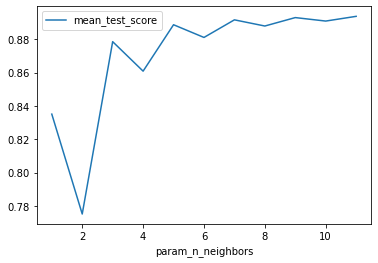

In [69]:
results_knn.plot('param_n_neighbors','mean_test_score')

In [71]:
knn = KNeighborsClassifier(n_neighbors=11, n_jobs=-1)
knn_new.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=11)

In [74]:
pred = knn_new.predict(x_test)

In [75]:
accuracy_score(y_test, pred)

0.8942844595018508